# Import Data

In [1]:
import glob, pylab, pandas as pd
import pydicom, numpy as np
from os import listdir
from os.path import isfile, join
import matplotlib.pylab as plt
import os
import cv2
import seaborn as sns
import torch
import torch.nn as nn
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

In [2]:
train = pd.read_csv('../Data/CSV/full_kaggle_dataset_ICH_subtypes.csv')

In [3]:
train.head(10)

ID  Label
0          ID_12cadc6af_epidural      0
1  ID_12cadc6af_intraparenchymal      0
2  ID_12cadc6af_intraventricular      0
3      ID_12cadc6af_subarachnoid      0
4          ID_12cadc6af_subdural      0
5               ID_12cadc6af_any      0
6          ID_38fd7baa0_epidural      0
7  ID_38fd7baa0_intraparenchymal      0
8  ID_38fd7baa0_intraventricular      0
9      ID_38fd7baa0_subarachnoid      0

In [4]:
train.shape

(4516842, 2)

In [5]:
newtable = train.copy()

In [6]:
train.Label.isnull().sum()

0

In [7]:
# Images Example
train_images_dir = '../Data/TRAIN/'
train_images = [f for f in listdir(train_images_dir) if isfile(join(train_images_dir, f))]
test_images_dir = '../Data/TEST/'
test_images = [f for f in listdir(test_images_dir) if isfile(join(test_images_dir, f))]
print('5 Training images', train_images[:5]) # Print the first 5

5 Training images ['ID_000039fa0.dcm', 'ID_00005679d.dcm', 'ID_00008ce3c.dcm', 'ID_0000950d7.dcm', 'ID_0000aee4b.dcm']


In [8]:
print('Number of train images:', len(train_images))
print('Number of test images:', len(test_images))

Number of train images: 674257
Number of test images: 121232


# Overview

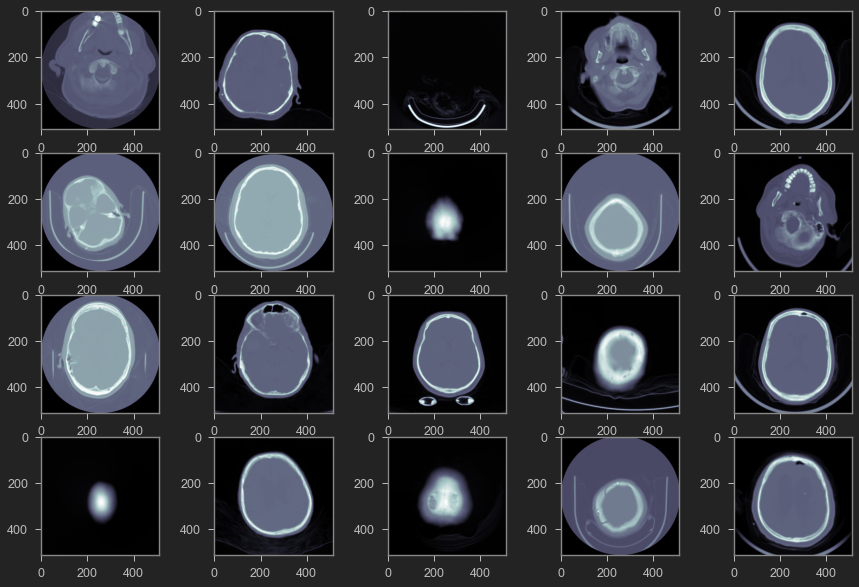

In [12]:
fig=plt.figure(figsize=(15, 10))
columns = 5; rows = 4
for i in range(1, columns*rows +1):
    ds = pydicom.dcmread(train_images_dir + train_images[i])
    fig.add_subplot(rows, columns, i)
    plt.imshow(ds.pixel_array, cmap=plt.cm.bone)
    fig.add_subplot

In [13]:
print(ds) # this is file type of image

Dataset.file_meta -------------------------------
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 10000000061155
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.3.4
(0002, 0013) Implementation Version Name         SH: 'RSNA Challenge 2019'
-------------------------------------------------
(0008, 0018) SOP Instance UID                    UI: ID_000280440
(0008, 0060) Modality                            CS: 'CT'
(0010, 0020) Patient ID                          LO: 'ID_2c05685b'
(0020, 000d) Study Instance UID                  UI: ID_a40e615e1b
(0020, 000e) Series Instance UID                 UI: ID_ef53ad805d
(0020, 0010) Study ID                            SH: ''
(0020, 0032) Image Position (Patient)            DS: [-109, 4, 194.900024]
(0020, 0037) Image Orientation (Patient)         DS: [1, 0, 0, 0, 1, 0]
(0028, 0002) Sample

In [14]:
im = ds.pixel_array
print(type(im))
print(im.dtype)
print(im.shape)

<class 'numpy.ndarray'>
uint16
(512, 512)


# Data Visualization  

C:\Users\alqna\anaconda3\envs\bakalarka2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Label', ylabel='count'>

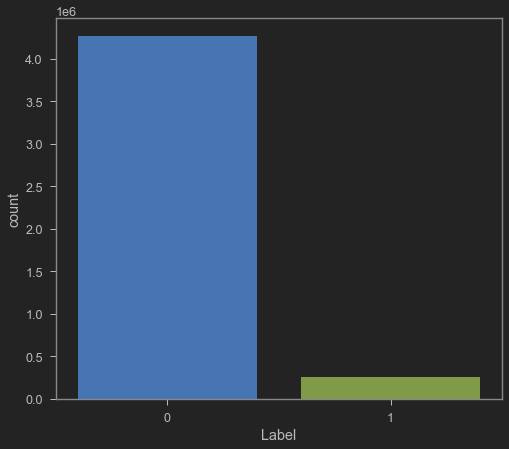

In [15]:
sns.countplot(train.Label)

In [16]:
train.Label.value_counts()

0    4260600
1     256242
Name: Label, dtype: int64

(-0.5, 511.5, 511.5, -0.5)

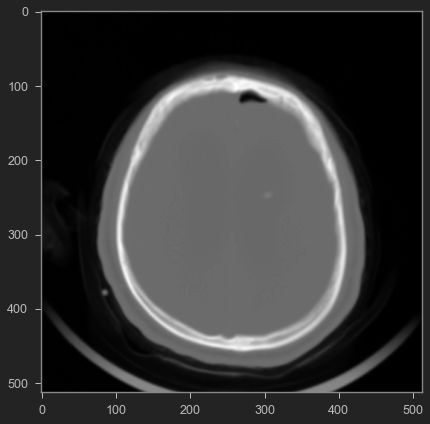

In [17]:
# To take a look at this first DICOM image, using pylab.imshow() method:
pylab.imshow(im, cmap=pylab.cm.gist_gray)
pylab.axis('on')

In [18]:
train['Sub_type'] = train['ID'].str.split("_", n = 3, expand = True)[2]
train['PatientID'] = train['ID'].str.split("_", n = 3, expand = True)[1]

In [19]:
train.count()

ID           4516842
Label        4516842
Sub_type     4516842
PatientID    4516842
dtype: int64

In [20]:
train_images_dir = '../Data/TRAIN/'
train_images = [f for f in listdir(train_images_dir) if isfile(join(train_images_dir, f))]

In [21]:
print(len(train_images))

674257


In [24]:
trainStand = pd.read_csv('../Data/CSV/full_kaggle_dataset_ICH_subtypes.csv', index_col=0)
trainStand

any  epidural  intraparenchymal  intraventricular  subarachnoid  \
filename                                                                        
ID_000039fa0    0         0                 0                 0             0   
ID_00005679d    0         0                 0                 0             0   
ID_00008ce3c    0         0                 0                 0             0   
ID_0000950d7    0         0                 0                 0             0   
ID_0000aee4b    0         0                 0                 0             0   
...           ...       ...               ...               ...           ...   
ID_ffff73ede    0         0                 0                 0             0   
ID_ffff80705    0         0                 0                 0             0   
ID_ffff82e46    0         0                 0                 0             0   
ID_ffff922b9    1         0                 0                 1             0   
ID_fffff9393    0         0                 0                 0             0   

              subdural  
filename                
ID_000039fa0         0  
ID_00005679d         0  
ID_00008ce3c         0  
ID_0000950d7         0  
ID_0000aee4b         0  
...                ...  
ID_ffff73ede         0  
ID_ffff80705         0  
ID_ffff82e46         0  
ID_ffff922b9         0  
ID_fffff9393         0  

[674257 rows x 6 columns]

In [22]:
gbSub = train.groupby('Sub_type').sum()
gbSub

Label
Sub_type                
any               107933
epidural            3145
intraparenchymal   36118
intraventricular   26205
subarachnoid       35675
subdural           47166

<AxesSubplot:xlabel='Label', ylabel='Sub_type'>

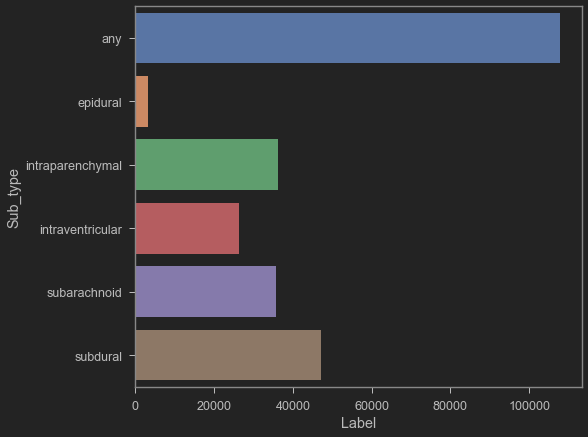

In [23]:
sns.barplot(y=gbSub.index, x=gbSub.Label, palette="deep")

Text(0.5, 1.0, 'Total Images by Subtype')

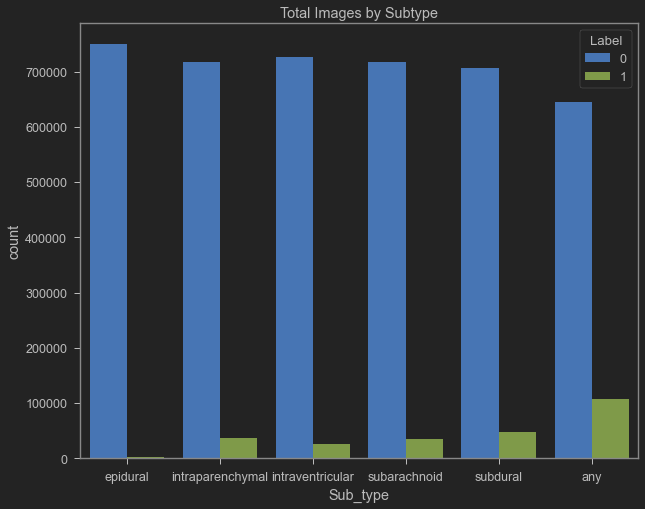

In [24]:
fig=plt.figure(figsize=(10, 8))

sns.countplot(x="Sub_type", hue="Label", data=train)

plt.title("Total Images by Subtype")

# Visualization of hemorrhage subtypes

In [25]:
def window_image(img, window_center,window_width, intercept, slope):

    img = (img*slope +intercept)
    img_min = window_center - window_width//2
    img_max = window_center + window_width//2
    img[img<img_min] = img_min
    img[img>img_max] = img_max
    return img 
    

In [26]:
def get_first_of_dicom_field_as_int(x):
    #get x[0] as in int is x is a 'pydicom.multival.MultiValue', otherwise get int(x)
    if type(x) == pydicom.multival.MultiValue:
        return int(x[0])
    else:
        return int(x)

def get_windowing(data):
    dicom_fields = [data[('0028','1050')].value, #window center
                    data[('0028','1051')].value, #window width
                    data[('0028','1052')].value, #intercept
                    data[('0028','1053')].value] #slope
    return [get_first_of_dicom_field_as_int(x) for x in dicom_fields]

In [27]:
train_images_dir

def view_images(images, title = '', aug = None):
    width = 5
    height = 2
    fig, axs = plt.subplots(height, width, figsize=(15,5))
    
    for im in range(0, height * width): 
        data = pydicom.read_file(os.path.join(train_images_dir,'ID_'+images[im]+ '.dcm'))
        image = data.pixel_array
        window_center , window_width, intercept, slope = get_windowing(data)
        image_windowed = window_image(image, window_center, window_width, intercept, slope)


        i = im // width
        j = im % width
        axs[i,j].imshow(image_windowed, cmap=plt.cm.bone) 
        axs[i,j].axis('off')
        
        
    plt.suptitle(title)
    plt.show()

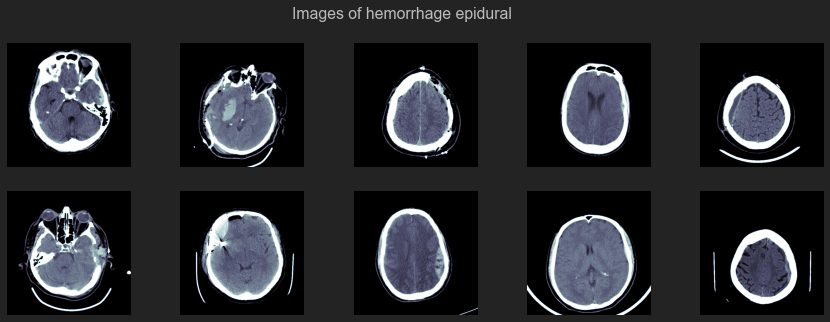

In [44]:
view_images(train[(train['Sub_type'] == 'epidural') & (train['Label'] == 1)][2000:3060].PatientID.values, title = 'Images of hemorrhage epidural')

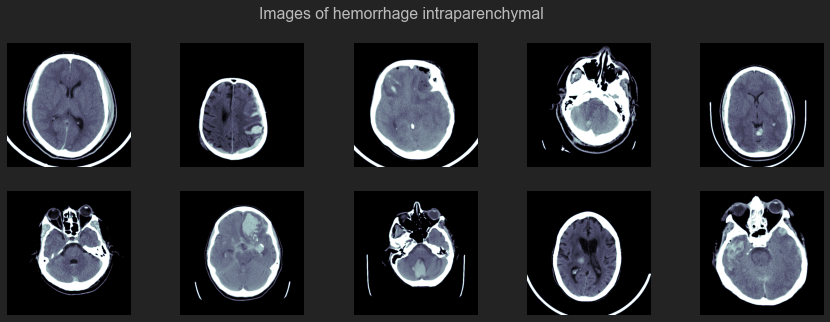

In [36]:
view_images(train[(train['Sub_type'] == 'intraparenchymal') & (train['Label'] == 1)][10300:10320].PatientID.values, title = 'Images of hemorrhage intraparenchymal')

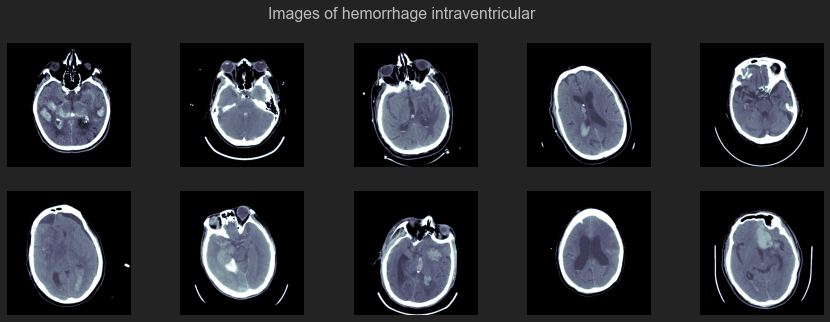

In [45]:
view_images(train[(train['Sub_type'] == 'intraventricular') & (train['Label'] == 1)][2000:3060].PatientID.values, title = 'Images of hemorrhage intraventricular')

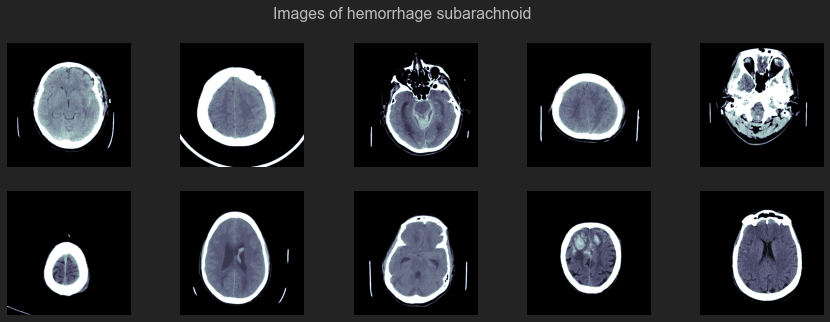

In [31]:
view_images(train[(train['Sub_type'] == 'subarachnoid') & (train['Label'] == 1)][:20].PatientID.values, title = 'Images of hemorrhage subarachnoid')

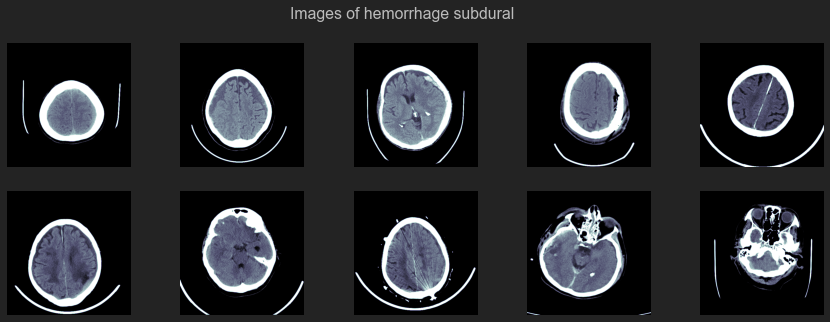

In [48]:
view_images(train[(train['Sub_type'] == 'subdural') & (train['Label'] == 1)][3000:4060].PatientID.values, title = 'Images of hemorrhage subdural')

### Convert dcm to png "" Not needed!""

In [ ]:
######################################################################
#### Function to get the Dicom file and transfer it to PNG format ####
######################################################################
def get_first_of_dicom_field_as_int(x):
    if type(x) == pydicom.multival.MultiValue:
        return int(x[0])
    return int(x)

def get_id(img_dicom):
    return str(img_dicom.SOPInstanceUID)

def get_metadata_from_dicom(img_dicom):
    metadata = {
        "window_center": img_dicom.WindowCenter,
        "window_width": img_dicom.WindowWidth,
        "intercept": img_dicom.RescaleIntercept,
        "slope": img_dicom.RescaleSlope,
    }
    return {k: get_first_of_dicom_field_as_int(v) for k, v in metadata.items()}

def window_image(img, window_center, window_width, intercept, slope):
    img = img * slope + intercept
    img_min = window_center - window_width // 2
    img_max = window_center + window_width // 2
    img[img < img_min] = img_min
    img[img > img_max] = img_max
    return img 

def resize(img, new_w, new_h):
    img = PIL.Image.fromarray(img.astype(np.int8), mode="L")
    return img.resize((new_w, new_h), resample=PIL.Image.BICUBIC)

def save_img(img_pil, subfolder, name):
    img_pil.save(subfolder+'/'+name+'.png')

def normalize_minmax(img):
    mi, ma = img.min(), img.max()
    return (img - mi) / (ma - mi)

def prepare_image(img_path):
    img_dicom = pydicom.read_file(img_path)
    img_id = get_id(img_dicom)
    metadata = get_metadata_from_dicom(img_dicom)
    img = window_image(img_dicom.pixel_array, **metadata)
    img = normalize_minmax(img) * 255
    img = PIL.Image.fromarray(img.astype(np.int8), mode="L")
    return img_id, img

def prepare_and_save(img_path, subfolder):
    try:
        img_id, img_pil = prepare_image(img_path)
        save_img(img_pil, subfolder, img_id)
    except KeyboardInterrupt:
        raise
    except:
        l.error('Error processing the image: {'+img_path+'}')

def prepare_images(imgs_path, subfolder):
     for i in tqdm(imgs_path):
        prepare_and_save(i, subfolder)
        
def prepare_images_njobs(img_paths, subfolder, n_jobs=-1):
    joblib.Parallel(n_jobs=n_jobs)(joblib.delayed(prepare_and_save)(i, subfolder) for i in tqdm(img_paths))

imgs_path = glob('Bachelor_Data/rsna-intracranial-hemorrhage-detection/stage_2_train/*')
subfolder = 'stage_2_train_png/'
# converter
prepare_images_njobs(imgs_path,subfolder)